# Training Spectrally Normalized Wasserstein-GAN with Gradient Penalty - MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 5e-5
NUM_EPOCHES = 100
CRIT_REPEATS = 5

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from models.SNGAN import SNGAN_Discriminator
from models.DCGAN import DCGAN_Generator

In [8]:
latent_dim = 64
g_out_size = 1
g_hidden_size = 256

d_hidden_size = 16

g = DCGAN_Generator(latent_dim, g_out_size, g_hidden_size).to(device)
d = SNGAN_Discriminator(g_out_size, d_hidden_size).to(device)
print(g)
print(d)

from utils.model import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

DCGAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(64, 1024, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvTranspose2d(256, 1, kernel_size=(4, 4), stride=(2, 2))
    (4): Tanh()
  )
)
SNGAN_Discriminator(
  (discriminator): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 1, 28, 28])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
from Loss_F.loss import W_Crit_Loss, W_Gen_Loss

w_crit_loss = W_Crit_Loss(10)
w_gen_loss = W_Gen_Loss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1: Generator Loss: -0.5703892671266821; Discriminator Loss: 4.406023717790781


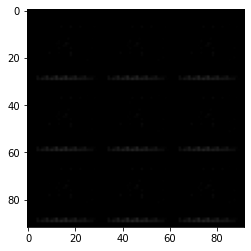

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2: Generator Loss: -0.6126501345431118; Discriminator Loss: 1.514183242971708


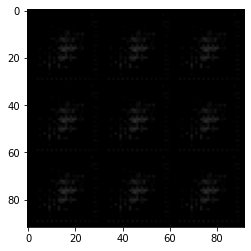

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3: Generator Loss: -0.5720395361945065; Discriminator Loss: 0.9048896413622131


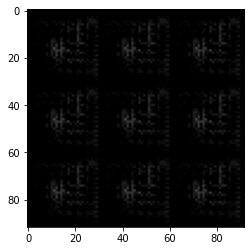

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4: Generator Loss: -0.3978646384564036; Discriminator Loss: 0.42444490053252126


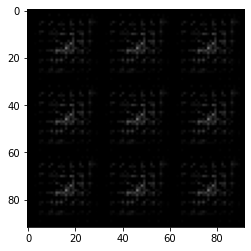

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5: Generator Loss: -0.3836579429202163; Discriminator Loss: 0.30703935934536475


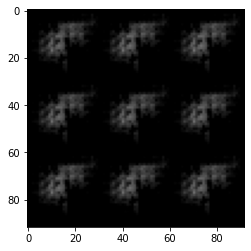

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6: Generator Loss: -0.33819416321423484; Discriminator Loss: 0.35990213610406596


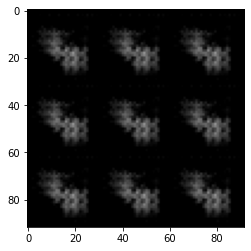

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7: Generator Loss: -0.43780320093866243; Discriminator Loss: 0.19805767886610678


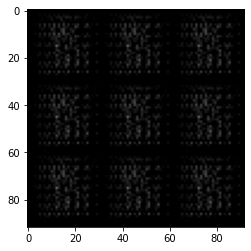

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8: Generator Loss: -0.43484953442749297; Discriminator Loss: 0.09162155350388235


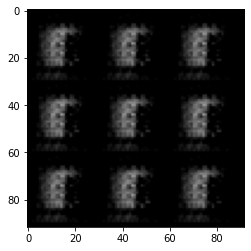

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9: Generator Loss: -0.4580483332470949; Discriminator Loss: 0.019502612732366646


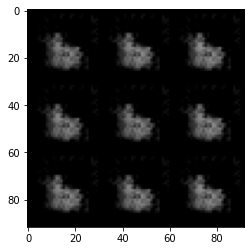

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10: Generator Loss: -0.6114504298801894; Discriminator Loss: -0.03521412159048162


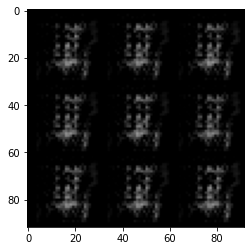

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11: Generator Loss: -0.5258247644455829; Discriminator Loss: -0.1956736821959267


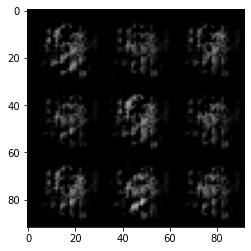

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12: Generator Loss: -0.5593466042264946; Discriminator Loss: -0.08613998337166275


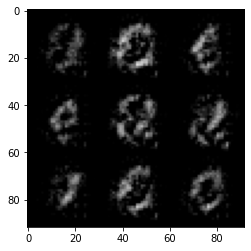

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13: Generator Loss: -0.2308604492178397; Discriminator Loss: -0.22747590566939643


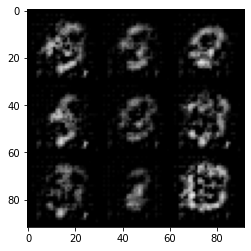

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14: Generator Loss: -0.17235295412772056; Discriminator Loss: -0.3613259933364673


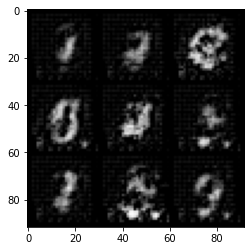

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15: Generator Loss: -0.2046637041846723; Discriminator Loss: -0.35086578233187427


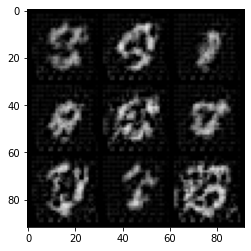

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16: Generator Loss: -0.3657165063527236; Discriminator Loss: -0.3726208235504527


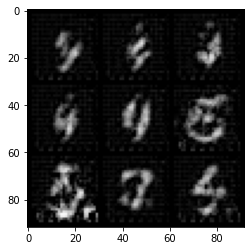

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 17: Generator Loss: -0.37942354207528806; Discriminator Loss: -0.3976296291907014


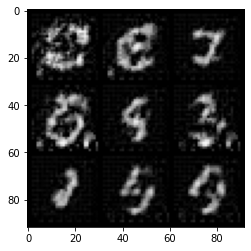

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 18: Generator Loss: -0.4585584224150109; Discriminator Loss: -0.37912972240305703


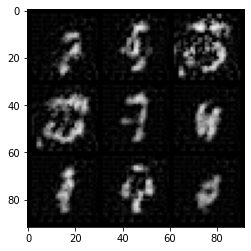

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 19: Generator Loss: -0.5273331939431427; Discriminator Loss: -0.31463389533685104


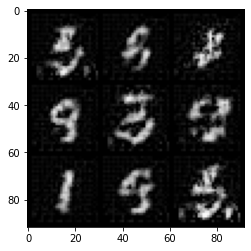

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20: Generator Loss: -0.6352364519464054; Discriminator Loss: -0.28277767116406466


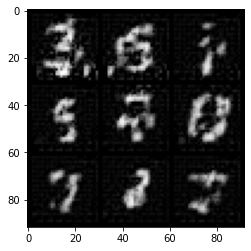

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21: Generator Loss: -0.6924894785166962; Discriminator Loss: -0.26825304280386686


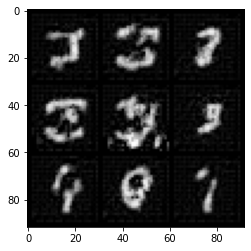

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22: Generator Loss: -0.6828948403321413; Discriminator Loss: -0.25139490334765846


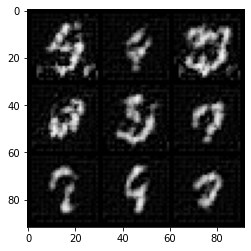

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23: Generator Loss: -0.7897308297109789; Discriminator Loss: -0.256270722669166


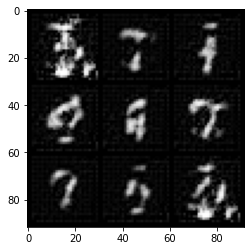

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24: Generator Loss: -0.7520743375743376; Discriminator Loss: -0.27144106171850463


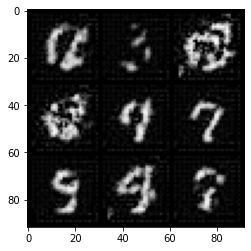

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25: Generator Loss: -0.7570632591144617; Discriminator Loss: -0.30175219407039044


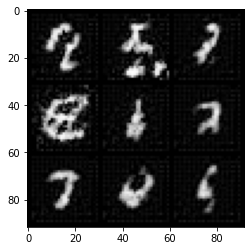

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26: Generator Loss: -0.863065688764609; Discriminator Loss: -0.3277449470394649


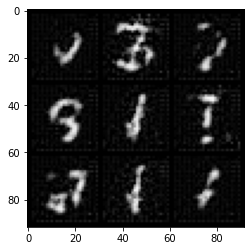

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27: Generator Loss: -0.9727083129176834; Discriminator Loss: -0.3359609402231633


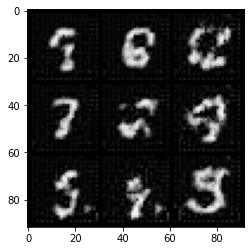

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28: Generator Loss: -0.9515345408372692; Discriminator Loss: -0.34294356674726395


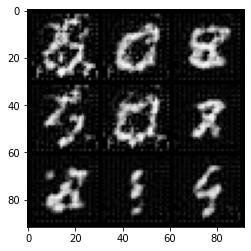

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29: Generator Loss: -0.9728790376700763; Discriminator Loss: -0.34229731471982705


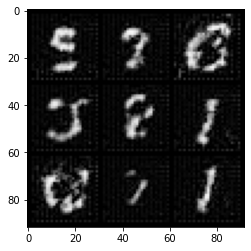

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30: Generator Loss: -1.122900993311043; Discriminator Loss: -0.32499539297717467


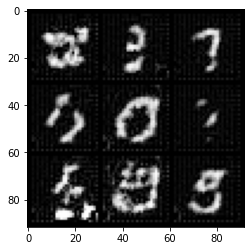

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31: Generator Loss: -0.9609550370423715; Discriminator Loss: -0.3555801213566044


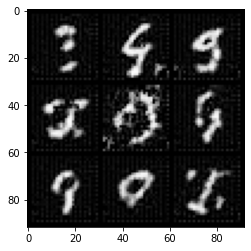

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32: Generator Loss: -1.0391660795838975; Discriminator Loss: -0.36480834214751506


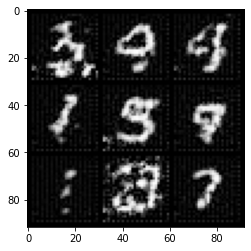

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33: Generator Loss: -1.0828940774848275; Discriminator Loss: -0.36535751665038846


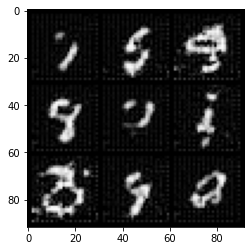

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34: Generator Loss: -1.1020782608499151; Discriminator Loss: -0.4072772425875421


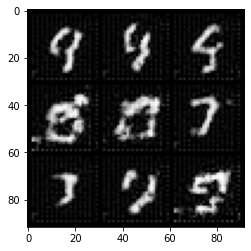

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35: Generator Loss: -1.0047545200432224; Discriminator Loss: -0.4242092172442471


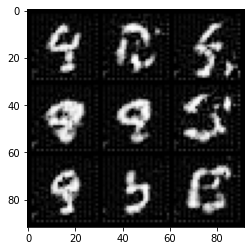

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36: Generator Loss: -0.7555626172270539; Discriminator Loss: -0.42103639920589647


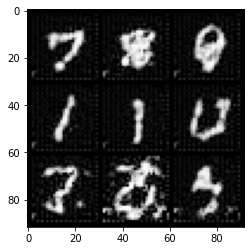

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37: Generator Loss: -0.6169391578690869; Discriminator Loss: -0.4497811122545235


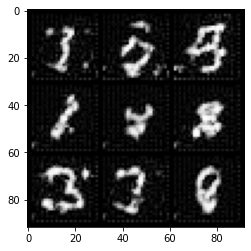

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38: Generator Loss: -0.40396750252296737; Discriminator Loss: -0.48368036710798107


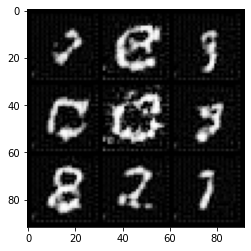

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39: Generator Loss: -0.43830162985746796; Discriminator Loss: -0.47996536556091174


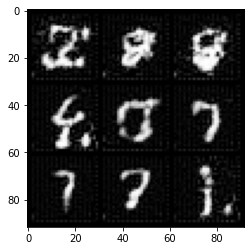

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40: Generator Loss: -0.5890419672149966; Discriminator Loss: -0.5017613292014449


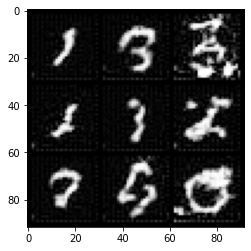

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41: Generator Loss: -0.8736361232198981; Discriminator Loss: -0.48653678310745097


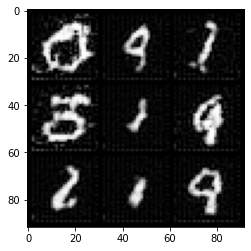

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42: Generator Loss: -1.0664780559038112; Discriminator Loss: -0.46630515298927255


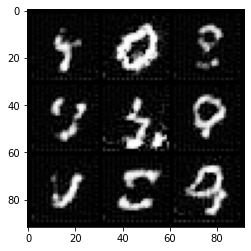

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43: Generator Loss: -1.3141878644691538; Discriminator Loss: -0.45296849319572285


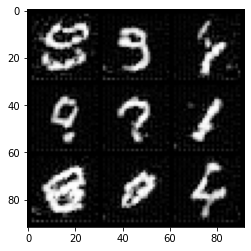

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44: Generator Loss: -1.2054816137300308; Discriminator Loss: -0.4242429299617629


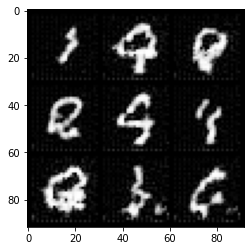

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45: Generator Loss: -1.2439101625329205; Discriminator Loss: -0.417884742555175


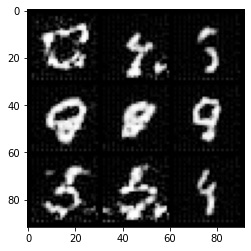

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46: Generator Loss: -1.2181049488159195; Discriminator Loss: -0.4090544984685872


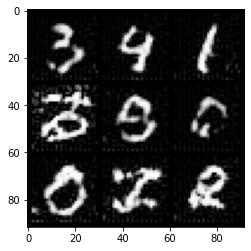

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47: Generator Loss: -1.5609498628055745; Discriminator Loss: -0.4069266679782123


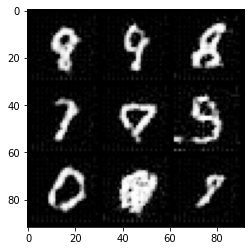

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48: Generator Loss: -1.575501860240534; Discriminator Loss: -0.38024661764542234


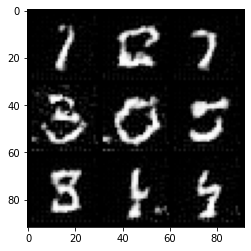

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49: Generator Loss: -1.640891573655961; Discriminator Loss: -0.4122974385755628


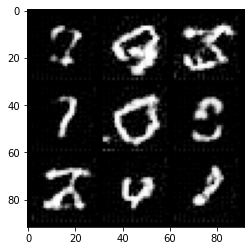

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50: Generator Loss: -1.5482238712452494; Discriminator Loss: -0.38865042323314103


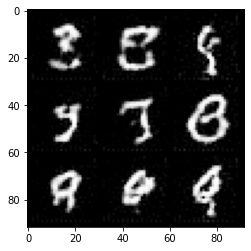

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 51: Generator Loss: -1.625815297713253; Discriminator Loss: -0.4133437298039702


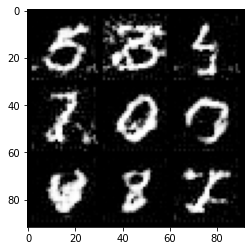

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 52: Generator Loss: -1.6927576158712032; Discriminator Loss: -0.34457061401069927


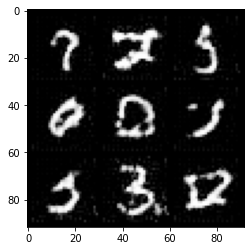

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 53: Generator Loss: -1.9590798226167272; Discriminator Loss: -0.3291247701208823


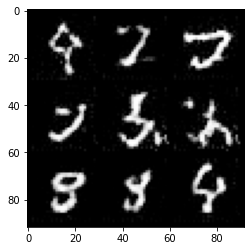

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 54: Generator Loss: -2.0066304208198464; Discriminator Loss: -0.30306452188545535


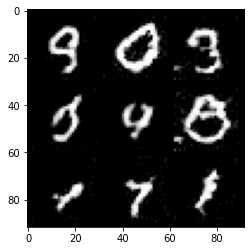

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55: Generator Loss: -2.0183316284119446; Discriminator Loss: -0.322610154052946


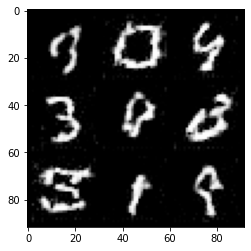

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 56: Generator Loss: -1.9212793449579335; Discriminator Loss: -0.3487748197504262


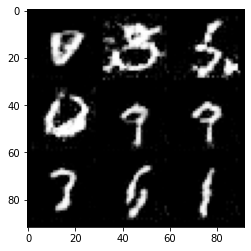

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 57: Generator Loss: -2.221314395581291; Discriminator Loss: -0.2888009574014082


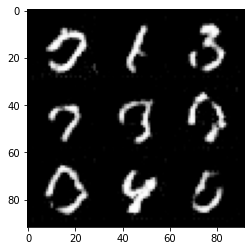

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 58: Generator Loss: -2.237423642929683; Discriminator Loss: -0.3309846383418198


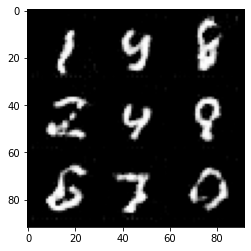

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 59: Generator Loss: -2.036206734857198; Discriminator Loss: -0.3364689421000037


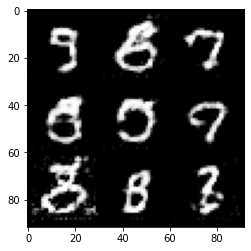

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 60: Generator Loss: -1.9314695257765016; Discriminator Loss: -0.37084607540814496


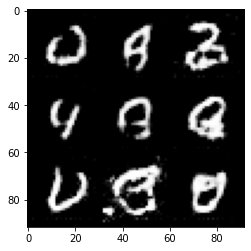

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 61: Generator Loss: -1.8478352920865135; Discriminator Loss: -0.32052539771379074


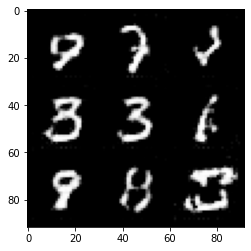

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 62: Generator Loss: -1.515308274178585; Discriminator Loss: -0.31548459339124385


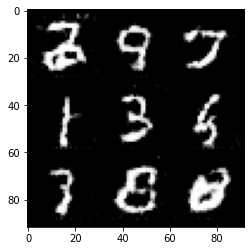

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 63: Generator Loss: -1.4720575341712565; Discriminator Loss: -0.32717632558752807


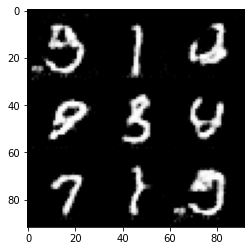

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 64: Generator Loss: -1.6225306169866627; Discriminator Loss: -0.2816632777516016


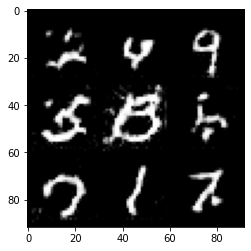

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65: Generator Loss: -1.4701120222031054; Discriminator Loss: -0.23501686338764208


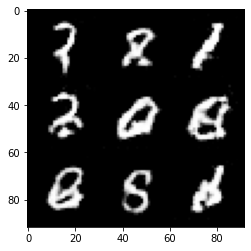

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 66: Generator Loss: -1.4765094623986337; Discriminator Loss: -0.22337441617555476


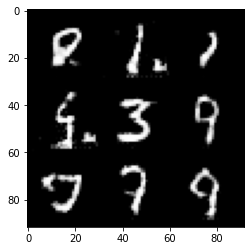

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 67: Generator Loss: -1.2215377269014875; Discriminator Loss: -0.2959781777161337


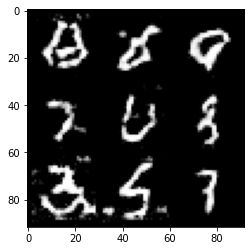

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 68: Generator Loss: -1.1869029613203808; Discriminator Loss: -0.2771816824783267


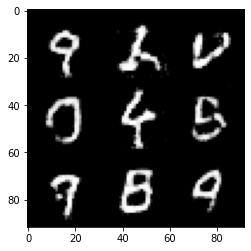

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 69: Generator Loss: -1.5427755282472955; Discriminator Loss: -0.25841752625167813


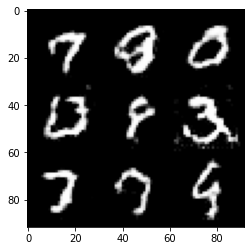

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 70: Generator Loss: -1.3801835529299686; Discriminator Loss: -0.3083941877253656


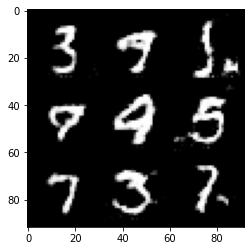

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 71: Generator Loss: -1.2436033029561993; Discriminator Loss: -0.22732531365150127


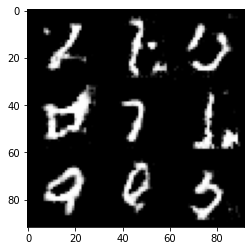

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 72: Generator Loss: -1.5291381775101682; Discriminator Loss: -0.2677661923651914


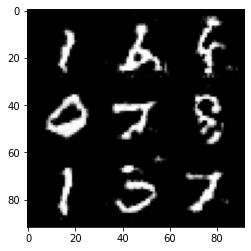

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 73: Generator Loss: -1.6095153886014655; Discriminator Loss: -0.27774054101392254


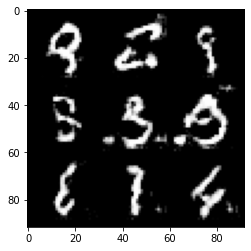

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 74: Generator Loss: -2.028513259983171; Discriminator Loss: -0.31174432119048834


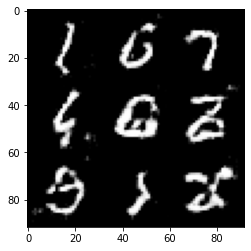

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75: Generator Loss: -1.9944332121158523; Discriminator Loss: -0.2737369718514619


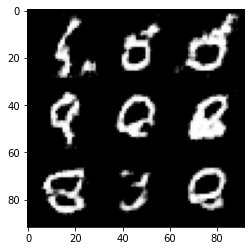

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 76: Generator Loss: -2.155480905271161; Discriminator Loss: -0.20131572649470664


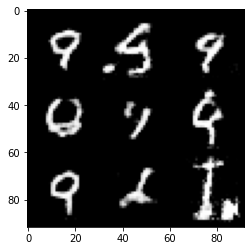

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 77: Generator Loss: -2.240255015278692; Discriminator Loss: -0.15766212756175593


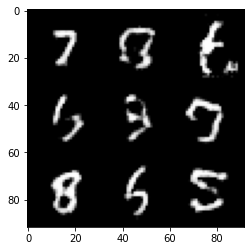

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 78: Generator Loss: -2.2933423598763594; Discriminator Loss: -0.22250874598762763


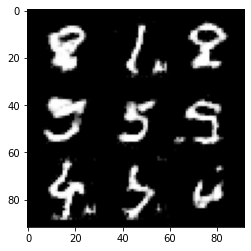

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 79: Generator Loss: -2.4704897826763865; Discriminator Loss: -0.21388033429847772


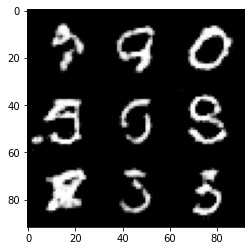

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 80: Generator Loss: -2.234839735072114; Discriminator Loss: -0.25999999164597704


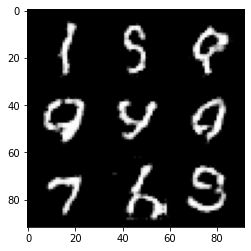

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 81: Generator Loss: -2.5052953597340886; Discriminator Loss: -0.20488564688752062


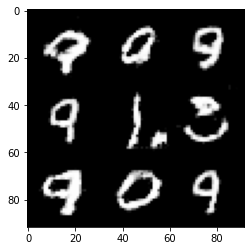

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 82: Generator Loss: -2.131813004144283; Discriminator Loss: -0.07395777392830614


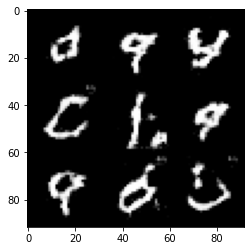

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 83: Generator Loss: -3.0092086264494258; Discriminator Loss: -0.19245864800386045


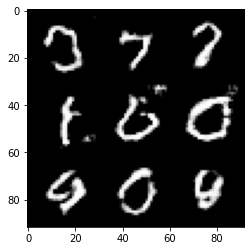

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 84: Generator Loss: -2.294714004794227; Discriminator Loss: -0.2137548127277162


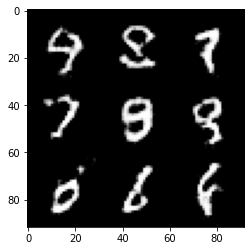

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 85: Generator Loss: -2.494644956389216; Discriminator Loss: -0.1865168180999789


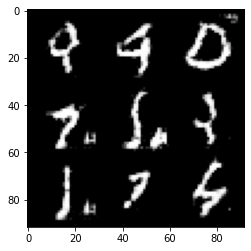

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 86: Generator Loss: -3.0204895452808724; Discriminator Loss: -0.193565569305693


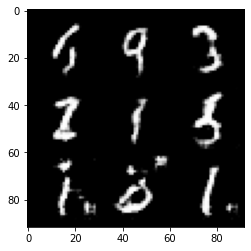

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 87: Generator Loss: -2.7032126176760776; Discriminator Loss: -0.15589104933477532


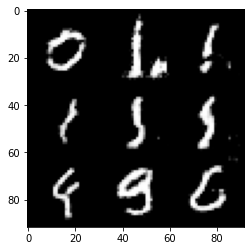

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 88: Generator Loss: -3.163488977189575; Discriminator Loss: -0.14463634309904982


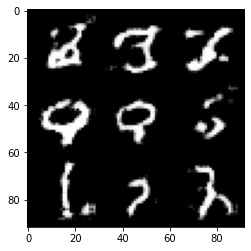

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 89: Generator Loss: -3.0499497262367816; Discriminator Loss: -0.16132699970457778


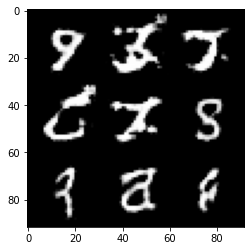

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 90: Generator Loss: -2.9925186297278414; Discriminator Loss: -0.09228616208076341


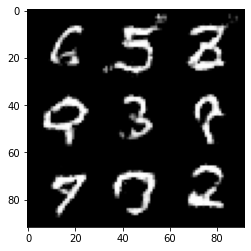

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 91: Generator Loss: -3.197686663838719; Discriminator Loss: -0.22099971324959983


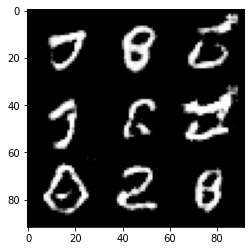

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 92: Generator Loss: -3.165948449778976; Discriminator Loss: -0.24475935926791947


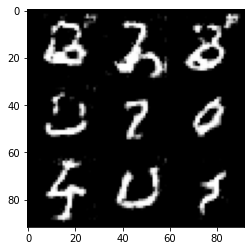

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 93: Generator Loss: -2.875416778139214; Discriminator Loss: -0.09323946325970238


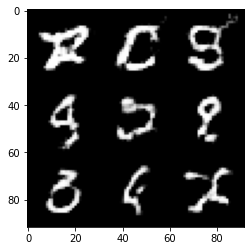

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 94: Generator Loss: -3.2347178448444365; Discriminator Loss: -0.056867604730511764


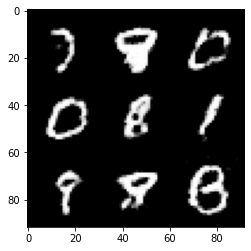

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 95: Generator Loss: -3.502792400218594; Discriminator Loss: -0.1514694367418252


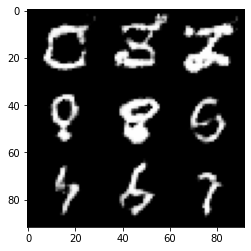

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 96: Generator Loss: -3.3299193497755124; Discriminator Loss: -0.18620325152807915


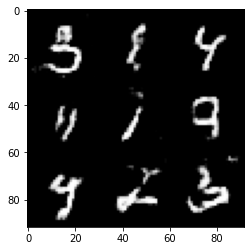

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 97: Generator Loss: -3.594293983823963; Discriminator Loss: -0.12976875353906392


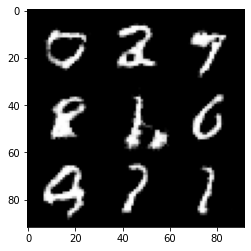

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 98: Generator Loss: -3.1343223212846816; Discriminator Loss: -0.055292027201384306


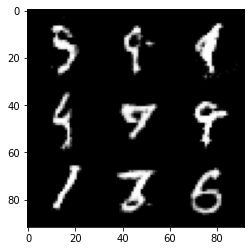

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 99: Generator Loss: -3.7133591510434902; Discriminator Loss: -0.16337593542034637


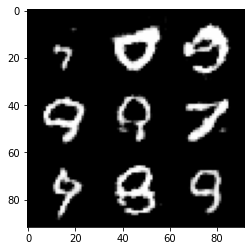

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 100: Generator Loss: -3.660525138952585; Discriminator Loss: -0.1745119826133446


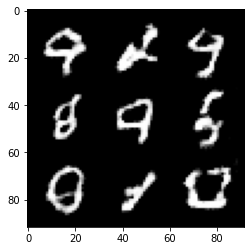

In [11]:
from utils.train import Wasserstein_Crit_Train

loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for real, label in trainloader:
        b = real.size(0)
        real = real.to(device)
        
        loss = Wasserstein_Crit_Train(d, g, d_optimizer, w_crit_loss, CRIT_REPEATS, real, latent_dim, device=device)
        epoch_d_loss += loss
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        
        g_loss = w_gen_loss(pred)
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%1==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu")
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()